# 2.1 Модельная часть


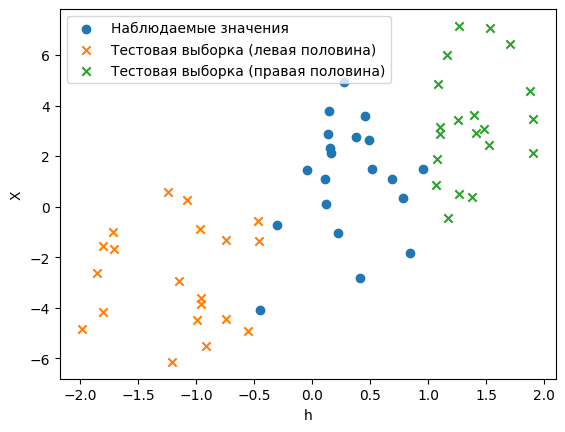

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры модели
sigma = 2
h_values = np.random.uniform(-2, 2, 60)  # 60 значений h
f = lambda x: np.sin(3*x) + 1.5*np.cos(4*x) + 2*x  # Функция f(h)

# Создаем данные
X_values = f(h_values) + np.random.normal(0, sigma, 60)

# Создаем тестовую выборку
sorted_indices = np.argsort(h_values)  # Отсортированные индексы для всех значений

# Выбираем 20 самых левых и 20 самых правых значений
test_indices_left = sorted_indices[:20]
test_indices_right = sorted_indices[-20:]

# Выбираем соответствующие данные
test_h_values_left = h_values[test_indices_left]
test_X_values_left = X_values[test_indices_left]

test_h_values_right = h_values[test_indices_right]
test_X_values_right = X_values[test_indices_right]

test_h_values = np.concatenate((test_h_values_left, test_h_values_right))
test_X_values = np.concatenate((test_X_values_left, test_X_values_right))

# Выбираем данные для обучающей выборки (между тестовыми выборками)
train_indices = sorted_indices[20:-20]

X_train = X_values[train_indices]
h_train = h_values[train_indices]


# Визуализация данных
plt.scatter(h_train, X_train, label='Наблюдаемые значения')
plt.scatter(test_h_values_left, test_X_values_left, label='Тестовая выборка (левая половина)', marker='x')
plt.scatter(test_h_values_right, test_X_values_right, label='Тестовая выборка (правая половина)', marker='x')
plt.legend()
plt.xlabel('h')
plt.ylabel('X')
plt.show()


# 2.2 Метод наименьших квадратов

**Найти МНК-оценки неизвестных параметров:**

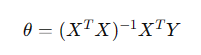

In [ ]:
# Матрица признаков X
X = np.column_stack((np.ones_like(h_values), h_values))

# Вектор наблюдаемых значений Y
Y = X_values

# МНК-оценки параметров
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

# Выводим оценки параметров
print("МНК-оценки параметров:")
print("θ0_hat =", theta_hat[0])
print("θ1_hat =", theta_hat[1])

МНК-оценки параметров:
θ0_hat = 0.16638475380381434
θ1_hat = 2.195586590729714


**Построить график:**

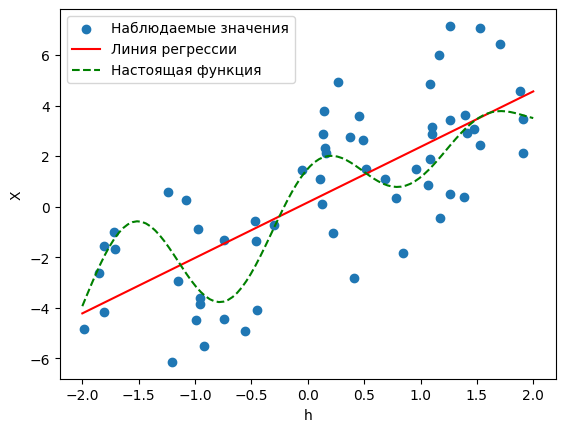

In [ ]:
# Генерируем точки для построения линии регрессии
h_line = np.linspace(-2, 2, 100)
X_line = theta_hat[0] + theta_hat[1] * h_line

h_range = np.linspace(-2, 2, 100).reshape(-1, 1)

# Визуализация данных и линии регрессии
plt.scatter(h_values, X_values, label='Наблюдаемые значения')
plt.plot(h_line, X_line, color='red', label='Линия регрессии')
plt.plot(h_range, f(h_range), label='Настоящая функция', color='green', linestyle='--')
plt.legend()
plt.xlabel('h')
plt.ylabel('X')
plt.show()

**Вычислить коэффициент детерминации:**

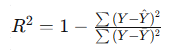

In [ ]:
# Вычисляем коэффициент детерминации
Y_hat = X @ theta_hat
R_squared = 1 - np.sum((Y - Y_hat)**2) / np.sum((Y - np.mean(Y))**2)

# Выводим коэффициент детерминации
print("Коэффициент детерминации R^2 =", R_squared)

Коэффициент детерминации R^2 = 0.555282077501615


**Найти оценку ковариационной матрицы МНК-оценки:**

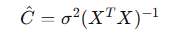

In [ ]:
# Оценка дисперсии ошибок
sigma_hat_squared = np.sum((Y - Y_hat)**2) / (len(Y) - 2)

# Оценка ковариационной матрицы МНК-оценки
C_hat = sigma_hat_squared * np.linalg.inv(X.T @ X)

# Выводим оценку ковариационной матрицы
print("Оценка ковариационной матрицы МНК-оценки:")
print(C_hat)

Оценка ковариационной матрицы МНК-оценки:
[[ 0.08422491 -0.01153126]
 [-0.01153126  0.06656472]]


**Найти значения информационных критериев:**
Наиболее часто используемые информационные критерии - AIC (Критерий Акаике) и BIC (Байесовский информационный критерий)

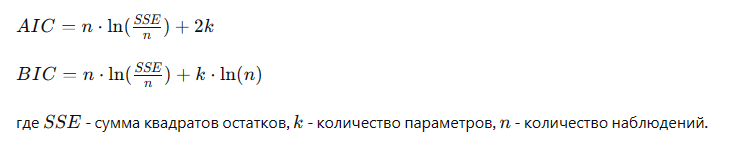

In [ ]:
# Сумма квадратов остатков
SSE = np.sum((Y - Y_hat)**2)

# Количество параметров
k = 2  # θ0 и θ1

# Количество наблюдений
n = len(Y)

# Вычисляем AIC и BIC
AIC = n * np.log(SSE/n) + 2*k
BIC = n * np.log(SSE/n) + k * np.log(n)

# Выводим значения информационных критериев
print("AIC =", AIC)
print("BIC =", BIC)

AIC = 97.73050786745402
BIC = 101.91919699189822


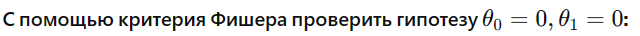

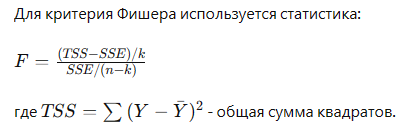

In [ ]:
from scipy.stats import f

# Общая сумма квадратов
TSS = np.sum((Y - np.mean(Y))**2)

# Статистика критерия Фишера
F_statistic = ((TSS - SSE) / k) / (SSE / (n - k))

# Выводим статистику критерия Фишера
print("Статистика критерия Фишера =", F_statistic)

# Задаем уровень значимости
alpha = 0.05

# Число параметров в числителе и знаменателе
df_model = 2  # Количество параметров в числителе (число предикторов)
df_residual = len(Y) - df_model - 1  # Количество степеней свободы в знаменателе

# Рассчитываем критическое значение F-распределения
critical_value = f.ppf(1 - alpha, df_model, df_residual)

# Проводим тест на уровне значимости alpha
if F_statistic > critical_value:
    print("Отвергаем нулевую гипотезу. По критерию Фишера, хотя бы один из коэффициентов не равен нулю.")
else:
    print("Не отвергаем нулевую гипотезу. По критерию Фишера, оба коэффициента равны нулю.")

Статистика критерия Фишера = 36.209874693335095
Отвергаем нулевую гипотезу. По критерию Фишера, хотя бы один из коэффициентов не равен нулю.


**Построить доверительные интервалы:**

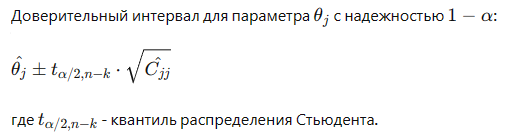

In [ ]:
from scipy.stats import t

# Уровни доверия
alpha_1 = 0.95
alpha_2 = 0.8

# Квантили распределения Стьюдента
t_alpha_1 = t.ppf(1 - (1 - alpha_1) / 2, n - k)
t_alpha_2 = t.ppf(1 - (1 - alpha_2) / 2, n - k)

# Доверительные интервалы
CI_1 = [theta_hat[0] - t_alpha_1 * np.sqrt(C_hat[0, 0]), theta_hat[0] + t_alpha_1 * np.sqrt(C_hat[0, 0])]
CI_2 = [theta_hat[1] - t_alpha_1 * np.sqrt(C_hat[1, 1]), theta_hat[1] + t_alpha_1 * np.sqrt(C_hat[1, 1])]

CI_3 = [theta_hat[0] - t_alpha_2 * np.sqrt(C_hat[0, 0]), theta_hat[0] + t_alpha_2 * np.sqrt(C_hat[0, 0])]
CI_4 = [theta_hat[1] - t_alpha_2 * np.sqrt(C_hat[1, 1]), theta_hat[1] + t_alpha_2 * np.sqrt(C_hat[1, 1])]

# Выводим доверительные интервалы
print("Доверительный интервал (надежность 0.95) для θ0:", CI_1)
print("Доверительный интервал (надежность 0.95) для θ1:", CI_2)
print("Доверительный интервал (надежность 0.8) для θ0:", CI_3)
print("Доверительный интервал (надежность 0.8) для θ1:", CI_4)

Доверительный интервал (надежность 0.95) для θ0: [-0.41454423695421494, 0.7473137445618436]
Доверительный интервал (надежность 0.95) для θ1: [1.6791406796874604, 2.7120325017719678]
Доверительный интервал (надежность 0.8) для θ0: [-0.2098267900503279, 0.5425962976579566]
Доверительный интервал (надежность 0.8) для θ1: [1.861134503467137, 2.530038677992291]


**Построить оценку метода наименьших модулей:**

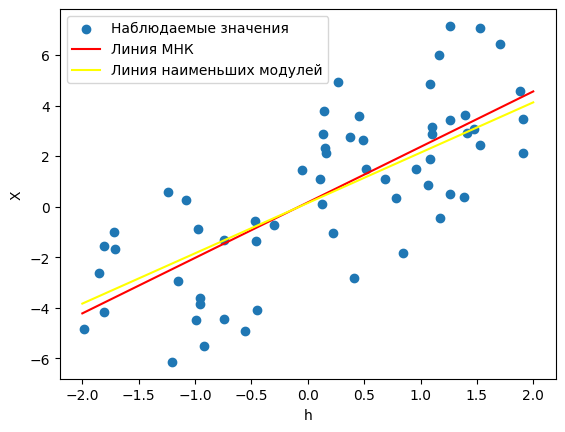

In [ ]:
from scipy.optimize import minimize

# Функция для минимизации
def loss_function(theta, X, Y):
    return np.sum(np.abs(Y - X @ theta))

# Оценка метода наименьших модулей
theta_robust = minimize(loss_function, np.zeros(2), args=(X, Y)).x

# Генерируем точки для построения линии регрессии
X_line_robust = theta_robust[0] + theta_robust[1] * h_line


# Визуализация данных и линии регрессии
plt.scatter(h_values, X_values, label='Наблюдаемые значения')
plt.plot(h_line, X_line, color='red', label='Линия МНК')
plt.plot(h_line, X_line_robust, color='yellow', label='Линия наименьших модулей')
plt.legend()
plt.xlabel('h')
plt.ylabel('X')
plt.show()

**Оценить качество построенных регрессий на тестовой выборке:**

In [ ]:
# Предсказания МНК
Y_hat_test = np.column_stack((np.ones_like(test_h_values), test_h_values)) @ theta_hat

# Предсказания наименьших модулей
Y_robust_test = np.column_stack((np.ones_like(test_h_values), test_h_values)) @ theta_robust

# Вычисляем среднюю абсолютную ошибку на тестовой выборке
MAE_mnk = np.mean(np.abs(test_X_values - Y_hat_test))
MAE_robust = np.mean(np.abs(test_X_values - Y_robust_test))

# Выводим среднюю абсолютную ошибку
print("Средняя абсолютная ошибка для МНК на тестовой выборке:", MAE_mnk)
print("Средняя абсолютная ошибка для наименьших модулей на тестовой выборке:", MAE_robust)


Средняя абсолютная ошибка для МНК на тестовой выборке: 1.772335317646848
Средняя абсолютная ошибка для наименьших модулей на тестовой выборке: 1.7682108522512305


**Оценить качество построенных регрессий с помощью LOO_CV:**

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error

# Массив для хранения ошибок
errors_mnk = []
errors_robust = []

# LOO_CV для МНК
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    theta_hat_loo = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
    Y_hat_loo = X_test @ theta_hat_loo
    errors_mnk.append(mean_absolute_error(Y_test, Y_hat_loo))

# LOO_CV для наименьших модулей
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    theta_robust_loo = minimize(loss_function, np.zeros(2), args=(X_train, Y_train)).x
    Y_robust_loo = X_test @ theta_robust_loo
    errors_robust.append(mean_absolute_error(Y_test, Y_robust_loo))

# Выводим среднюю абсолютную ошибку для LOO_CV
print("Средняя абсолютная ошибка для МНК с LOO_CV:", np.mean(errors_mnk))
print("Средняя абсолютная ошибка для наименьших модулей с LOO_CV:", np.mean(errors_robust))


Средняя абсолютная ошибка для МНК с LOO_CV: 1.8634458262606273
Средняя абсолютная ошибка для наименьших модулей с LOO_CV: 1.9902425548871565


**Построить гистограмму и ядерную оценку плотности распределения остатков:**

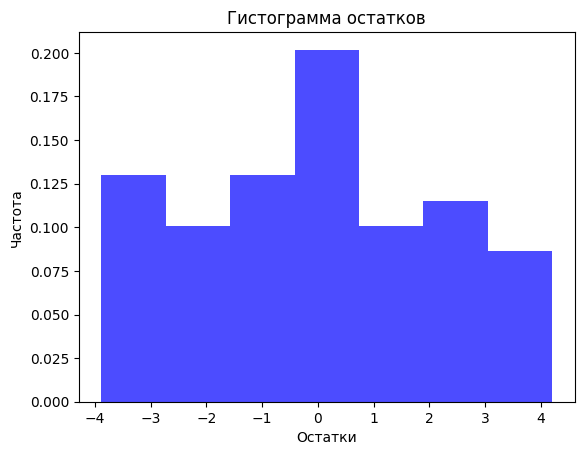

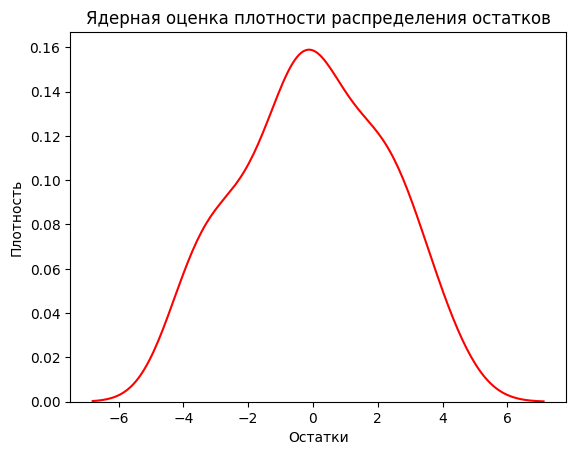

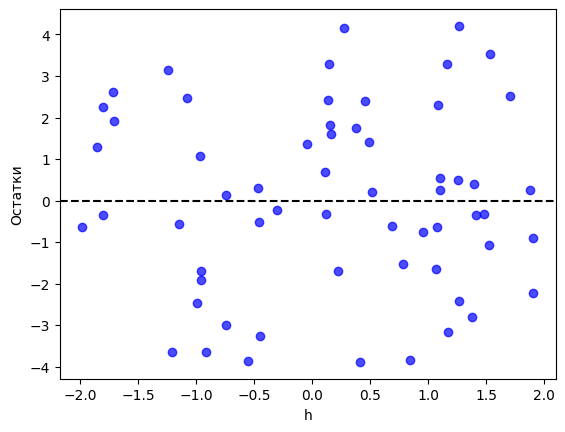

In [ ]:
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

# Вычисляем остатки
residuals = Y - Y_hat

# Гистограмма
plt.hist(residuals, bins='auto', density=True, alpha=0.7, color='blue')
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# Ядерная оценка плотности распределения
sns.kdeplot(residuals, label='Ядерная оценка', color='red')
plt.title('Ядерная оценка плотности распределения остатков')
plt.xlabel('Остатки')
plt.ylabel('Плотность')
plt.show()

plt.scatter(X[:, 1], residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('h')
plt.ylabel('Остатки')
plt.show()


**Проверить гипотезу о нормальности распределения остатков с помощью критерия Шапиро-Уилка:**


In [ ]:
# Тест Шапиро-Уилка
stat, p_value = shapiro(residuals)

# Выводим результаты теста
print("Статистика теста Шапиро-Уилка:", stat)
print("p-значение теста Шапиро-Уилка:", p_value)

# Проверка гипотезы
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о нормальности остатков не отвергается")
else:
    print("Гипотеза о нормальности остатков отвергается")


Статистика теста Шапиро-Уилка: 0.9716042876243591
p-значение теста Шапиро-Уилка: 0.17473824322223663
Гипотеза о нормальности остатков не отвергается


**Проверить гипотезу о нормальности распределения остатков с помощью критерия D'Agostino:**


In [ ]:
from scipy.stats import normaltest

# Вычисляем статистику критерия
stat, p_value = normaltest(residuals)

# Выводим результаты
print("Результаты теста D'Agostino's K^2 для МНК:")
print(f"Статистика критерия: {stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Отвергаем гипотезу о нормальности распределения")
else:
    print("Не отвергаем гипотезу о нормальности распределения")

Результаты теста D'Agostino's K^2 для МНК:
Статистика критерия: 3.8474524631760287
P-value: 0.1460616871783318
Не отвергаем гипотезу о нормальности распределения


**Проверить наличие автокорреляции с помощью критерия Дарбина-Уотсона:**

In [ ]:
# Вычисляем статистику Дарбина-Уотсона
dw_statistic = durbin_watson(residuals)

# Выводим статистику
print("Статистика Дарбина-Уотсона:", dw_statistic)

# Проверяем наличие автокорреляции
if dw_statistic < 1.5 or dw_statistic > 2.5:
    print("Есть подозрение на автокорреляцию в остатках")
else:
    print("Автокорреляция в остатках отсутствует")


Статистика Дарбина-Уотсона: 1.9417563032606853
Автокорреляция в остатках отсутствует


**Проверить наличие гетероскедастичности:**

In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Тест Гольдфельда-Квандта
stat, p_value, _ = het_goldfeldquandt(Y - Y_hat, X)

# Выводим результаты теста
print("Статистика теста Гольдфельда-Квандта:", stat)
print("p-значение теста Гольдфельда-Квандта:", p_value)

# Проверка наличия гетероскедастичности
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о гомоскедастичности остатков не отвергается")
else:
    print("Гипотеза о гомоскедастичности остатков отвергается")


Статистика теста Гольдфельда-Квандта: 0.6361017180085005
p-значение теста Гольдфельда-Квандта: 0.8812655660946604
Гипотеза о гомоскедастичности остатков не отвергается


На основе проведенных анализов остатков можно сделать следующие выводы:

Гистограмма и ядерная оценка плотности распределения остатков:
Остатки кажутся довольно близкими к нормальному распределению.

Тест Шапиро-Уилка (нормальность):p-значение теста Шапиро-Уилка выше 0.05, что может говорить о том, что остатки имеют нормальное распределение. Однако, результаты теста могут быть чувствительны к размеру выборки.

Тест Дарбина-Уотсона (автокорреляция):Статистика Дарбина-Уотсона близка к 2, что может указывать на отсутствие автокорреляции в остатках. Если статистика близка к 0 или 4, это может сигнализировать о наличии автокорреляции.

Тест Гольдфельда-Квандта (гетероскедастичность):
p-значение теста Гольдфельда-Квандта выше 0.05, что может говорить о том, что гипотеза о гомоскедастичности остатков не отвергается.

# 2.3 Полиномиальная регрессия

**Порядок полинома подбирать следующими способами:**

по значению среднеквадратической погрешности МНК-оценки

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Матрица признаков X
X = np.column_stack((np.ones_like(h_values), h_values))
# Вектор наблюдаемых значений Y
Y = X_values

# Задаем диапазон степеней полинома
degrees = range(1, 10)  # от 1 до 10

# Список для хранения среднеквадратических ошибок
mse_list = []

# Проводим кросс-валидацию для каждой степени полинома
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    loo = LeaveOneOut()
    mse_sum = 0.0

    for train_index, test_index in loo.split(X):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        model = LinearRegression()
        model.fit(X_train, Y_train)

        Y_pred = model.predict(X_test)
        mse_sum += mean_squared_error(Y_test, Y_pred)

    mse_mean = mse_sum / len(X)
    mse_list.append(mse_mean)

# Находим степень полинома с минимальной среднеквадратической ошибкой
optimal_degree = degrees[np.argmin(mse_list)]

# Построим модель с оптимальной степенью и получим коэффициенты
poly = PolynomialFeatures(degree=optimal_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)

# Выводим результаты
print(f"Оптимальная степень полинома: {optimal_degree}")
print(f"Коэффициенты модели: {model.coef_}")


Оптимальная степень полинома: 8
Коэффициенты модели: [ 1.97296321e-14  2.75147960e-13  6.04783738e-01  4.58799665e-14
  6.04783738e-01 -1.22470661e+00 -6.05765438e-15  6.04783738e-01
 -1.22470661e+00 -5.99245240e-01  0.00000000e+00  6.04783738e-01
 -1.22470661e+00 -5.99245240e-01  1.81939637e+00  0.00000000e+00
  6.04783738e-01 -1.22470661e+00 -5.99245240e-01  1.81939637e+00
  3.28113979e-01  0.00000000e+00  6.04783738e-01 -1.22470661e+00
 -5.99245240e-01  1.81939637e+00  3.28113979e-01 -9.81812037e-01
  0.00000000e+00  6.04783738e-01 -1.22470661e+00 -5.99245240e-01
  1.81939637e+00  3.28113979e-01 -9.81812037e-01 -7.51246641e-02
  0.00000000e+00  6.04783738e-01 -1.22470661e+00 -5.99245240e-01
  1.81939637e+00  3.28113979e-01 -9.81812037e-01 -7.51246641e-02
  2.91968814e-01]


по значению статистики критерия Фишера для гипотезы θp = 0

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import f

# Матрица признаков X
X = np.column_stack((np.ones_like(h_values), h_values))
# Вектор наблюдаемых значений Y
Y = X_values

# Задаем диапазон степеней полинома
degrees = range(1, 10)  # от 1 до 10

# Список для хранения статистик критерия Фишера
f_statistics = []

# Проводим оценку модели для каждой степени полинома
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, Y)

    # Вычисляем статистику критерия Фишера для гипотезы θp = 0
    df_model = degree + 1  # Число параметров в числителе (степень полинома + 1)
    df_residual = len(Y) - df_model - 1  # Количество степеней свободы в знаменателе
    f_statistic = (model.score(X_poly, Y) / df_model) / ((1 - model.score(X_poly, Y)) / df_residual)

    f_statistics.append(f_statistic)

# Находим степень полинома с максимальной статистикой критерия Фишера
optimal_degree = degrees[np.argmax(f_statistics)]

# Построим модель с оптимальной степенью и получим коэффициенты
poly = PolynomialFeatures(degree=optimal_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)

# Выводим результаты
print(f"Оптимальная степень полинома: {optimal_degree}")
print(f"Коэффициенты модели: {model.coef_}")
print(f"Статистика критерия Фишера: {f_statistics[np.argmax(f_statistics)]}")

# Выводим p-значение, если необходимо
p_value = 1 - f.cdf(f_statistics[np.argmax(f_statistics)], df_model, df_residual)
print(f"P-значение: {p_value}")

Оптимальная степень полинома: 1
Коэффициенты модели: [0.         0.         2.19558659]
Статистика критерия Фишера: 35.585566508967254
P-значение: 1.1102230246251565e-16


по MSE на тестовой выборке

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(h_values, X_values, test_size=0.33, random_state=42)

# Подбираем оптимальную степень полинома по значению MSE на тестовой выборке
degrees = range(1, 10)  # Диапазон степеней полинома
mse_test_list = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = poly.transform(X_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly_train, Y_train)

    Y_pred_test = model.predict(X_poly_test)
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    mse_test_list.append(mse_test)

optimal_degree = degrees[np.argmin(mse_test_list)]

# Построим модель с оптимальной степенью и получим коэффициенты
poly = PolynomialFeatures(degree=optimal_degree)
X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
X_poly_test = poly.transform(X_test.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly_train, Y_train)

# Выводим результаты
print(f"Оптимальная степень полинома: {optimal_degree}")
print(f"Коэффициенты модели: {model.coef_}")

# Предсказываем значения на тестовой выборке
test_X_poly = poly.transform(test_h_values.reshape(-1, 1))
test_Y_pred = model.predict(test_X_poly)

# Рассчитываем MSE на тестовой выборке
mse_test_final = mean_squared_error(test_X_values, test_Y_pred)
print(f"MSE на тестовой выборке: {mse_test_final}")


Оптимальная степень полинома: 8
Коэффициенты модели: [ 0.          3.53049767 -7.5614847  -1.1614634   7.60066066  0.0391287
 -2.50993133  0.04766301  0.26394671]
MSE на тестовой выборке: 3.849289273020864


по информационному критерию (AIC)

In [ ]:
# Создаем данные
X = np.column_stack((np.ones_like(h_values), h_values))
Y = X_values

# Задаем диапазон степеней полинома
degrees = range(1, 10)  # от 1 до 10

# Список для хранения AIC значений
aic_list = []

# Проводим оценку модели для каждой степени полинома
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, Y)

    # Вычисляем сумму квадратов ошибок (SSE)
    sse = np.sum((Y - model.predict(X_poly))**2)

    # Вычисляем количество параметров в модели
    num_params = degree + 1

    # Вычисляем AIC
    aic = len(Y) * np.log(sse/len(Y)) + 2 * num_params
    aic_list.append(aic)

# Находим степень полинома с минимальным AIC
optimal_degree_aic = degrees[np.argmin(aic_list)]

# Строим модель с оптимальной степенью
poly = PolynomialFeatures(degree=optimal_degree_aic)
X_poly = poly.fit_transform(X)
model_aic = LinearRegression()
model_aic.fit(X_poly, Y)

# Выводим результаты
print(f"Оптимальная степень полинома (по AIC): {optimal_degree_aic}")
print(f"Коэффициенты модели (по AIC): {model_aic.coef_}")

Оптимальная степень полинома (по AIC): 6
Коэффициенты модели (по AIC): [ 1.84740391e-15  1.37390099e-15  6.27139573e-01 -3.05311332e-16
  6.27139573e-01 -9.94816355e-01  0.00000000e+00  6.27139573e-01
 -9.94816355e-01 -3.36183701e-01  0.00000000e+00  6.27139573e-01
 -9.94816355e-01 -3.36183701e-01  1.31688260e+00  0.00000000e+00
  6.27139573e-01 -9.94816355e-01 -3.36183701e-01  1.31688260e+00
  1.12808821e-01  0.00000000e+00  6.27139573e-01 -9.94816355e-01
 -3.36183701e-01  1.31688260e+00  1.12808821e-01 -7.32576038e-01]


**Выберем степень полинома 5!**

In [ ]:
# Создаем данные
X = np.column_stack((np.ones_like(h_values), h_values))
Y = X_values

# Создаем матрицу признаков X с полиномиальными степенями от 1 до 5
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Строим модель с использованием МНК
model = LinearRegression()
model.fit(X_poly, Y)

# Выводим результаты
print(f"Коэффициенты модели: {model.coef_}")

Коэффициенты модели: [ 0.00000000e+00 -3.33066907e-16  8.16599519e-01  1.11022302e-16
  8.16599519e-01 -6.25606321e-02  0.00000000e+00  8.16599519e-01
 -6.25606321e-02 -5.13747431e-01  5.25486924e-46  8.16599519e-01
 -6.25606321e-02 -5.13747431e-01  5.79127894e-02  7.77876910e-62
  8.16599519e-01 -6.25606321e-02 -5.13747431e-01  5.79127894e-02
  2.60057365e-01]


**Строим график**

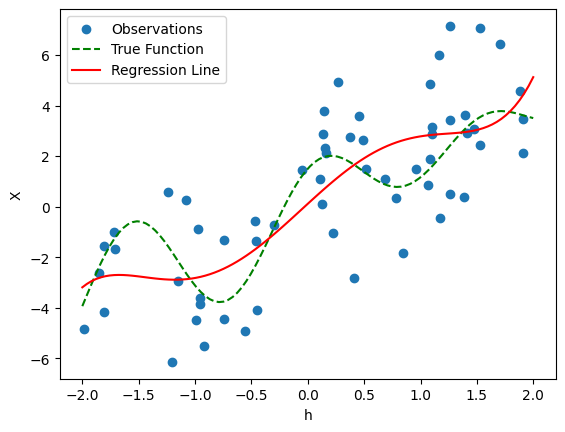

In [ ]:
f = lambda x: np.sin(3*x) + 1.5*np.cos(4*x) + 2*x

# Создаем данные
X = h_values.reshape(-1, 1)
Y = X_values

# Создаем матрицу признаков X с полиномиальными степенями от 1 до 5
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Строим модель с использованием МНК
model = LinearRegression()
model.fit(X_poly, Y)

# Генерируем значения для построения линии регрессии
h_range = np.linspace(-2, 2, 100).reshape(-1, 1)
X_range_poly = poly.transform(h_range)
Y_pred = model.predict(X_range_poly)

# Строим график
plt.scatter(X, Y, label='Observations')
plt.plot(h_range, f(h_range), label='True Function', color='green', linestyle='--')
plt.plot(h_range, Y_pred, label='Regression Line', color='red')
plt.xlabel('h')
plt.ylabel('X')
plt.legend()
plt.show()


**Гистограмма и ядерная оценка плотности распределения остатков:**

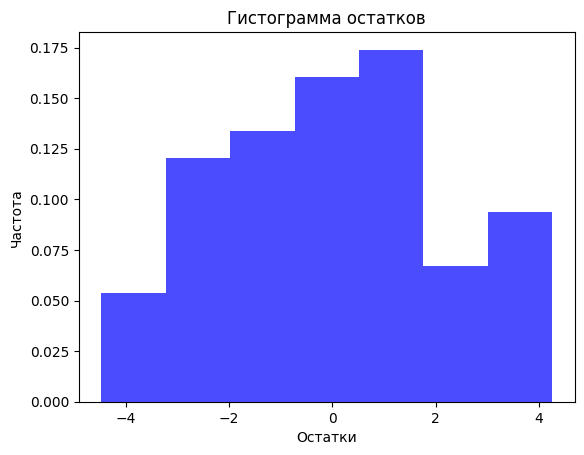

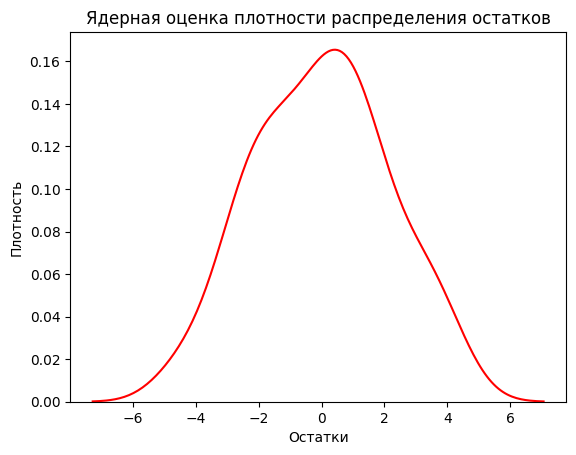

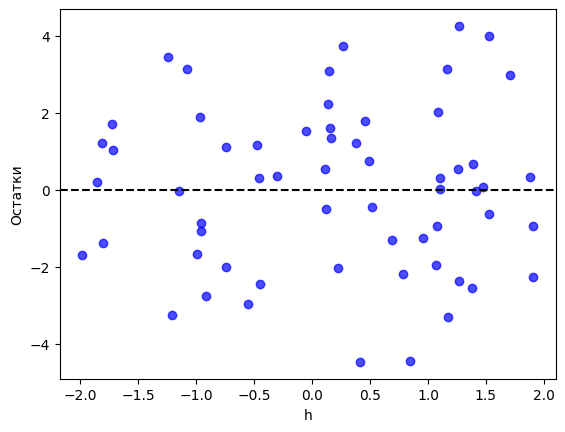

In [ ]:
# Вычисляем остатки
Y_pred = model.predict(X_poly)
residuals = Y - Y_pred

# Гистограмма
plt.hist(residuals, bins='auto', density=True, alpha=0.7, color='blue')
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# Ядерная оценка плотности распределения
sns.kdeplot(residuals, label='Ядерная оценка', color='red')
plt.title('Ядерная оценка плотности распределения остатков')
plt.xlabel('Остатки')
plt.ylabel('Плотность')
plt.show()

plt.scatter(X[:, 0], residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('h')
plt.ylabel('Остатки')
plt.show()


**Гипотеза о нормальности распределения остатков с помощью критерия Шапиро-Уилка:**

In [ ]:
# Тест Шапиро-Уилка
stat, p_value = shapiro(residuals)

# Выводим результаты теста
print("Статистика теста Шапиро-Уилка:", stat)
print("p-значение теста Шапиро-Уилка:", p_value)

# Проверка гипотезы
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о нормальности остатков не отвергается")
else:
    print("Гипотеза о нормальности остатков отвергается")


Статистика теста Шапиро-Уилка: 0.9852485656738281
p-значение теста Шапиро-Уилка: 0.6829645037651062
Гипотеза о нормальности остатков не отвергается


**Гипотеза о нормальности распределения остатков с помощью критерия D'Agostino:**

In [ ]:
# Вычисляем статистику критерия
stat, p_value = normaltest(residuals)

# Выводим результаты
print("Результаты теста D'Agostino's K^2 для МНК:")
print(f"Статистика критерия: {stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Отвергаем гипотезу о нормальности распределения")
else:
    print("Не отвергаем гипотезу о нормальности распределения")

Результаты теста D'Agostino's K^2 для МНК:
Статистика критерия: 1.2369858630046244
P-value: 0.5387557679217068
Не отвергаем гипотезу о нормальности распределения


**Наличие автокорреляции с помощью критерия Дарбина-Уотсона:**

In [ ]:
# Вычисляем статистику Дарбина-Уотсона
dw_statistic = durbin_watson(residuals)

# Выводим статистику
print("Статистика Дарбина-Уотсона:", dw_statistic)

# Проверяем наличие автокорреляции
if dw_statistic < 1.5 or dw_statistic > 2.5:
    print("Есть подозрение на автокорреляцию в остатках")
else:
    print("Автокорреляция в остатках отсутствует")


Статистика Дарбина-Уотсона: 1.9091255289278952
Автокорреляция в остатках отсутствует


**Проверить наличие гетероскедастичности:**

In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Тест Гольдфельда-Квандта
stat, p_value, _ = het_goldfeldquandt(Y - Y_pred, X)

# Выводим результаты теста
print("Статистика теста Гольдфельда-Квандта:", stat)
print("p-значение теста Гольдфельда-Квандта:", p_value)

# Проверка наличия гетероскедастичности
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о гомоскедастичности остатков не отвергается")
else:
    print("Гипотеза о гомоскедастичности остатков отвергается")


Статистика теста Гольдфельда-Квандта: 0.6411141008531949
p-значение теста Гольдфельда-Квандта: 0.8813811334455075
Гипотеза о гомоскедастичности остатков не отвергается


**Проверить мультиколлинеарность матрицы H^T*H**

In [ ]:
# X_poly - матрица признаков, уже с полиномиальными степенями
H = np.dot(X_poly.T, X_poly)

# Вычислим обратную матрицу
try:
    H_inv = np.linalg.inv(H)
    print("Мультиколлинеарность отсутствует.")
except np.linalg.LinAlgError:
    print("Мультиколлинеарность обнаружена: матрица H^T * H сингулярна.")

# Выведем собственные значения матрицы H^T * H
eigenvalues = np.linalg.eigvals(H)
print("Собственные значения матрицы H^T * H:")
print(eigenvalues)

# Находим максимальное и минимальное собственные значения
max_eigenvalue = max(eigenvalues)
min_eigenvalue = min(eigenvalues)

# Рассчитываем отношение максимального к минимальному собственному значению
condition_number = max_eigenvalue / min_eigenvalue

# Выводим результат
print("Максимальное собственное значение:", max_eigenvalue)
print("Минимальное собственное значение:", min_eigenvalue)
print("Отношение максимального к минимальному собственному значению (число условия):", condition_number)

Мультиколлинеарность отсутствует.
Собственные значения матрицы H^T * H:
[5.53219062e+03 1.70161149e+03 5.74212273e+01 3.87672561e+01
 5.09627855e+00 1.59921525e+00]
Максимальное собственное значение: 5532.190617468981
Минимальное собственное значение: 1.5992152533979287
Отношение максимального к минимальному собственному значению (число условия): 3459.3158148751227


# 2.4 Регрессия для наблюдений с выбросами

**Смоделировать ошибки с помощью распределения Тьюки** монетка на аномальное и нормальное наблюдение

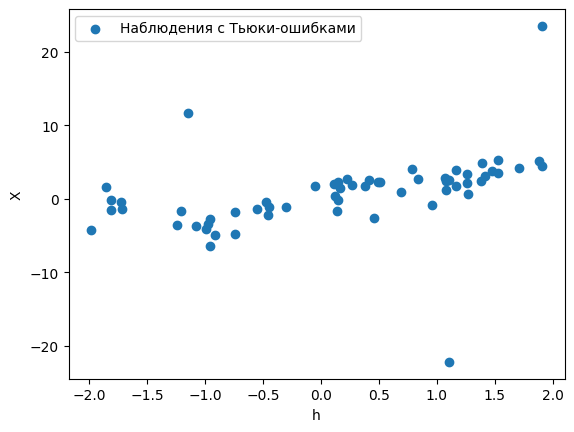

In [ ]:
from scipy.stats import t

# Используем ранее заданные параметры модели
#h_values = np.random.uniform(-2, 2, 60)  # 60 значений h

# Используем параметры распределения Тьюки
delta = 0.08
sigma0_squared = 2
sigma1_squared = 200

# Генерируем ошибки с использованием распределения Тьюки
num_outliers = int(delta * len(h_values))
errors = np.zeros_like(h_values)

# Генерируем ошибки для нормальных наблюдений
errors[:-num_outliers] = np.random.normal(0, np.sqrt(sigma0_squared), len(h_values) - num_outliers)

# Генерируем ошибки для выбросов
errors[-num_outliers:] = np.random.normal(0, np.sqrt(sigma1_squared), num_outliers)

# Смешиваем порядок ошибок
np.random.shuffle(errors)

# Генерируем зависимую переменную X
X_values_tukey = f(h_values) + errors  # Используем ранее заданную функцию f(h)

# Выводим результаты
plt.scatter(h_values, X_values_tukey, label='Наблюдения с Тьюки-ошибками')
plt.xlabel('h')
plt.ylabel('X')
plt.legend()
plt.show()


**Строим МНК оценку и оцениваем её качество**

In [ ]:
# Матрица признаков X
X = np.column_stack((np.ones_like(h_values), h_values))

# Вектор наблюдаемых значений Y
Y = X_values_tukey

# МНК-оценки параметров
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

# Вычисление предсказанных значений
Y_pred = X @ theta_hat

# Вычисление среднеквадратической ошибки (MSE)
mse = np.mean((Y - Y_pred)**2)

# Выводим оценки параметров и MSE
print("МНК-оценки параметров:")
print("θ0_hat =", theta_hat[0])
print("θ1_hat =", theta_hat[1])

print("Среднеквадратическая ошибка (MSE):", mse)


МНК-оценки параметров:
θ0_hat = 0.4127550024261221
θ1_hat = 1.9159953514318468
Среднеквадратическая ошибка (MSE): 22.6472929427474


**Анализ остатков (как раньше)**

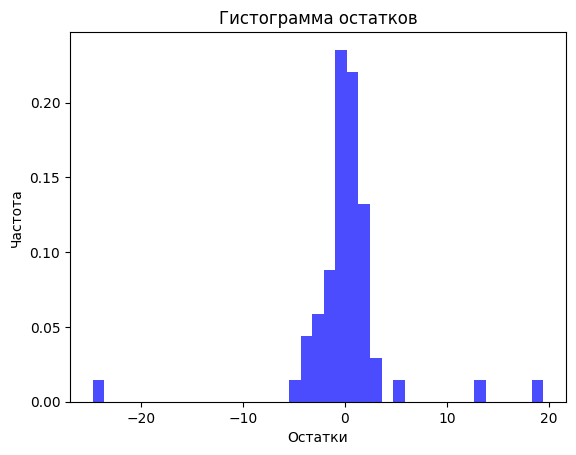

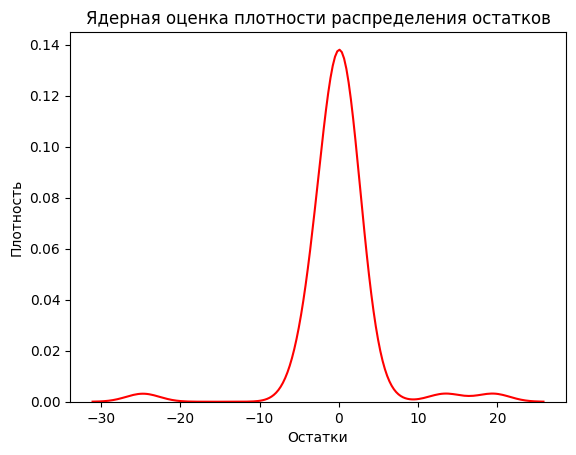

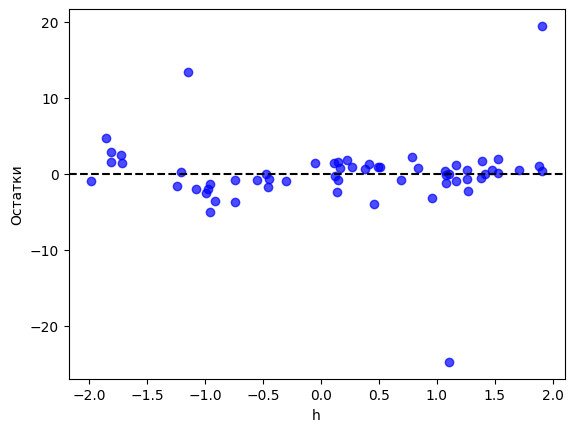

In [ ]:
residuals = Y - Y_pred

# Гистограмма
plt.hist(residuals, bins='auto', density=True, alpha=0.7, color='blue')
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# Ядерная оценка плотности распределения
sns.kdeplot(residuals, label='Ядерная оценка', color='red')
plt.title('Ядерная оценка плотности распределения остатков')
plt.xlabel('Остатки')
plt.ylabel('Плотность')
plt.show()

plt.scatter(X[:, 1], residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('h')
plt.ylabel('Остатки')
plt.show()


In [ ]:
# Тест Шапиро-Уилка
stat, p_value = shapiro(residuals)

# Выводим результаты теста
print("Статистика теста Шапиро-Уилка:", stat)
print("p-значение теста Шапиро-Уилка:", p_value)

# Проверка гипотезы
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о нормальности остатков не отвергается")
else:
    print("Гипотеза о нормальности остатков отвергается")


Статистика теста Шапиро-Уилка: 0.6365495920181274
p-значение теста Шапиро-Уилка: 6.348339215422882e-11
Гипотеза о нормальности остатков отвергается


In [ ]:
# Вычисляем статистику критерия
stat, p_value = normaltest(residuals)

# Выводим результаты
print("Результаты теста D'Agostino's K^2 для МНК:")
print(f"Статистика критерия: {stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Отвергаем гипотезу о нормальности распределения")
else:
    print("Не отвергаем гипотезу о нормальности распределения")

Результаты теста D'Agostino's K^2 для МНК:
Статистика критерия: 35.82049736434493
P-value: 1.6660108590821164e-08
Отвергаем гипотезу о нормальности распределения


In [ ]:
# Вычисляем статистику Дарбина-Уотсона
dw_statistic = durbin_watson(residuals)

# Выводим статистику
print("Статистика Дарбина-Уотсона:", dw_statistic)

# Проверяем наличие автокорреляции
if dw_statistic < 1.5 or dw_statistic > 2.5:
    print("Есть подозрение на автокорреляцию в остатках")
else:
    print("Автокорреляция в остатках отсутствует")


Статистика Дарбина-Уотсона: 2.0936163373870103
Автокорреляция в остатках отсутствует


In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Тест Гольдфельда-Квандта
stat, p_value, _ = het_goldfeldquandt(Y - Y_pred, X)

# Выводим результаты теста
print("Статистика теста Гольдфельда-Квандта:", stat)
print("p-значение теста Гольдфельда-Квандта:", p_value)

# Проверка наличия гетероскедастичности
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о гомоскедастичности остатков не отвергается")
else:
    print("Гипотеза о гомоскедастичности остатков отвергается")


Статистика теста Гольдфельда-Квандта: 2.0015606640132932
p-значение теста Гольдфельда-Квандта: 0.03577052754676014
Гипотеза о гомоскедастичности остатков отвергается


**График**

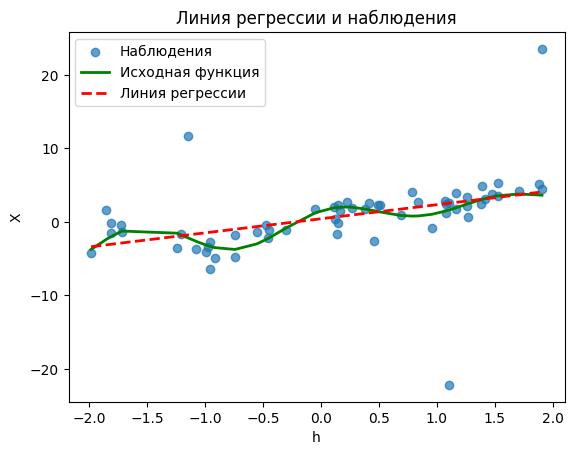

In [ ]:
import matplotlib.pyplot as plt

# Сортировка данных для более четкого отображения линии регрессии
sorted_indices = np.argsort(h_values)
h_values_sorted = h_values[sorted_indices]
X_values_tukey_sorted = X_values_tukey[sorted_indices]

# График наблюдений и исходной функции
plt.scatter(h_values, X_values_tukey, label='Наблюдения', alpha=0.7)
plt.plot(h_values_sorted, f(h_values_sorted), label='Исходная функция', color='green', linewidth=2)

# График линии регрессии
plt.plot(h_values_sorted, X[sorted_indices] @ theta_hat, label='Линия регрессии', color='red', linestyle='dashed', linewidth=2)

plt.xlabel('h')
plt.ylabel('X')
plt.legend()
plt.title('Линия регрессии и наблюдения')
plt.show()


**Отбраковка выбросов**

In [ ]:
import statsmodels.api as sm

# Определение границ интерквартильного размаха
Q1 = np.percentile(X_values_tukey, 25)
Q3 = np.percentile(X_values_tukey, 75)
IQR = Q3 - Q1

# Отбраковка выбросов
outlier_mask = (X_values_tukey >= Q1 - 1.3 * IQR) & (X_values_tukey <= Q3 + 1.3 * IQR)
h_values_filtered = h_values[outlier_mask]
X_values_tukey_filtered = X_values_tukey[outlier_mask]

# Построение МНК-оценки на отфильтрованных данных
X_mnk_filtered = sm.add_constant(h_values_filtered)
theta_hat_filtered = np.linalg.inv(X_mnk_filtered.T @ X_mnk_filtered) @ X_mnk_filtered.T @ X_values_tukey_filtered

# Оценка качества МНК-оценки на отфильтрованных данных
predictions_mnk_filtered = X_mnk_filtered @ theta_hat_filtered
mse_mnk_filtered = np.mean((X_values_tukey_filtered - predictions_mnk_filtered)**2)

# Вывод результатов
print("МНК-оценки параметров на отфильтрованных данных:")
print("θ0_hat =", theta_hat_filtered[0])
print("θ1_hat =", theta_hat_filtered[1])
print("Среднеквадратическая ошибка (MSE) на отфильтрованных данных:", mse_mnk_filtered)

# Вывод списка аномальных наблюдений
anomalous_h_values = h_values[~outlier_mask]
anomalous_X_values_tukey = X_values_tukey[~outlier_mask]

print("Аномальные наблюдения:")
for h, X_value in zip(anomalous_h_values, anomalous_X_values_tukey):
    print(f"h: {h}, X: {X_value}")


МНК-оценки параметров на отфильтрованных данных:
θ0_hat = 0.25518005952954403
θ1_hat = 2.0145320198406407
Среднеквадратическая ошибка (MSE) на отфильтрованных данных: 3.2962614800258465
Аномальные наблюдения:
h: 1.9073410261910446, X: 23.524630195145484
h: -1.1504822184948629, X: 11.609156131914238
h: 1.1013248425904667, X: -22.194571806049186


**График отфильтрованных наблюдений**

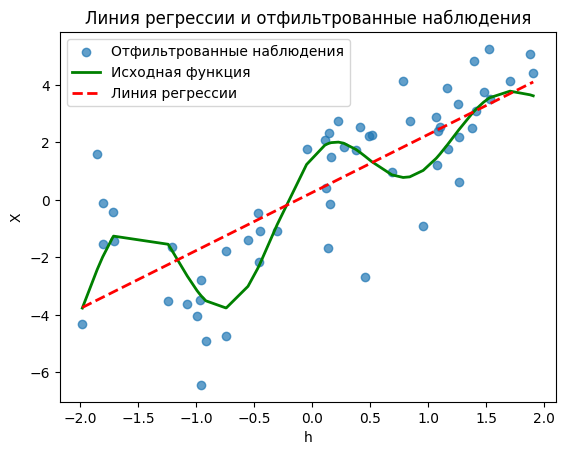

In [ ]:

# Сортировка отфильтрованных данных для более четкого отображения линии регрессии
sorted_indices_filtered = np.argsort(h_values_filtered)
h_values_filtered_sorted = h_values_filtered[sorted_indices_filtered]
X_values_tukey_filtered_sorted = X_values_tukey_filtered[sorted_indices_filtered]

# График наблюдений и исходной функции
plt.scatter(h_values_filtered, X_values_tukey_filtered, label='Отфильтрованные наблюдения', alpha=0.7)
plt.plot(h_values_sorted, f(h_values_sorted), label='Исходная функция', color='green', linewidth=2)

# График линии регрессии
plt.plot(h_values_filtered_sorted, X_mnk_filtered[sorted_indices_filtered] @ theta_hat_filtered, label='Линия регрессии', color='red', linestyle='dashed', linewidth=2)

plt.xlabel('h')
plt.ylabel('X')
plt.legend()
plt.title('Линия регрессии и отфильтрованные наблюдения')
plt.show()


**Анализ остатков**

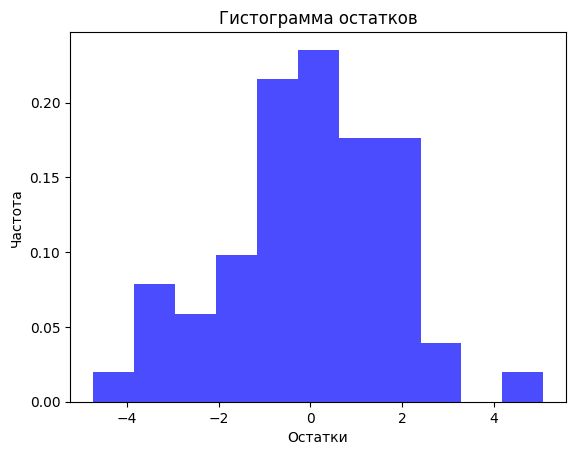

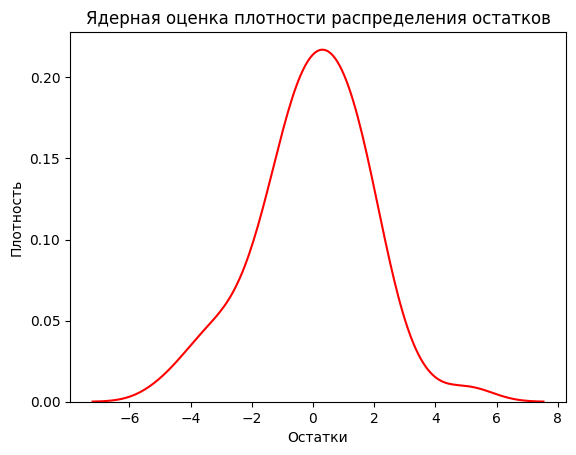

In [ ]:
residuals = X_values_tukey_filtered - predictions_mnk_filtered

# Гистограмма
plt.hist(residuals, bins='auto', density=True, alpha=0.7, color='blue')
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# Ядерная оценка плотности распределения
sns.kdeplot(residuals, label='Ядерная оценка', color='red')
plt.title('Ядерная оценка плотности распределения остатков')
plt.xlabel('Остатки')
plt.ylabel('Плотность')
plt.show()


In [ ]:
# Тест Шапиро-Уилка
stat, p_value = shapiro(residuals)

# Выводим результаты теста
print("Статистика теста Шапиро-Уилка:", stat)
print("p-значение теста Шапиро-Уилка:", p_value)

# Проверка гипотезы
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о нормальности остатков не отвергается")
else:
    print("Гипотеза о нормальности остатков отвергается")

Статистика теста Шапиро-Уилка: 0.9830151796340942
p-значение теста Шапиро-Уилка: 0.6024523377418518
Гипотеза о нормальности остатков не отвергается


In [ ]:
# Вычисляем статистику критерия
stat, p_value = normaltest(residuals)

# Выводим результаты
print("Результаты теста D'Agostino's K^2 для МНК:")
print(f"Статистика критерия: {stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Отвергаем гипотезу о нормальности распределения")
else:
    print("Не отвергаем гипотезу о нормальности распределения")

Результаты теста D'Agostino's K^2 для МНК:
Статистика критерия: 1.7463444256528833
P-value: 0.4176246514832189
Не отвергаем гипотезу о нормальности распределения


In [ ]:
# Вычисляем статистику Дарбина-Уотсона
dw_statistic = durbin_watson(residuals)

# Выводим статистику
print("Статистика Дарбина-Уотсона:", dw_statistic)

# Проверяем наличие автокорреляции
if dw_statistic < 1.5 or dw_statistic > 2.5:
    print("Есть подозрение на автокорреляцию в остатках")
else:
    print("Автокорреляция в остатках отсутствует")


Статистика Дарбина-Уотсона: 1.5737257218202194
Автокорреляция в остатках отсутствует


In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Тест Гольдфельда-Квандта
stat, p_value, _ = het_goldfeldquandt(X_values_tukey_filtered - predictions_mnk_filtered, X_mnk_filtered)

# Выводим результаты теста
print("Статистика теста Гольдфельда-Квандта:", stat)
print("p-значение теста Гольдфельда-Квандта:", p_value)

# Проверка наличия гетероскедастичности
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о гомоскедастичности остатков не отвергается")
else:
    print("Гипотеза о гомоскедастичности остатков отвергается")


Статистика теста Гольдфельда-Квандта: 0.9392397251106298
p-значение теста Гольдфельда-Квандта: 0.5624955934509148
Гипотеза о гомоскедастичности остатков не отвергается


**Метод наименьших модулей**

In [ ]:
from scipy.optimize import minimize

# Функция, которую нужно минимизировать (сумма модулей остатков)
def objective_function(theta, X, Y):
    return np.sum(np.abs(Y - X @ theta))

# Начальное приближение для theta
initial_theta = np.zeros(X_mnk_filtered.shape[1])

# Минимизация с использованием метода наименьших модулей
result_mnm = minimize(objective_function, initial_theta, args=(X_mnk_filtered, X_values_tukey_filtered), method='nelder-mead')

# Оценка параметров МНМ
theta_hat_mnm = result_mnm.x

# Вывод результатов
print("Оценка параметров метода наименьших модулей (МНМ):")
print("θ0_hat =", theta_hat_mnm[0])
print("θ1_hat =", theta_hat_mnm[1])


Оценка параметров метода наименьших модулей (МНМ):
θ0_hat = 0.12996904625223804
θ1_hat = 2.2389357775038103


**График МНМ**

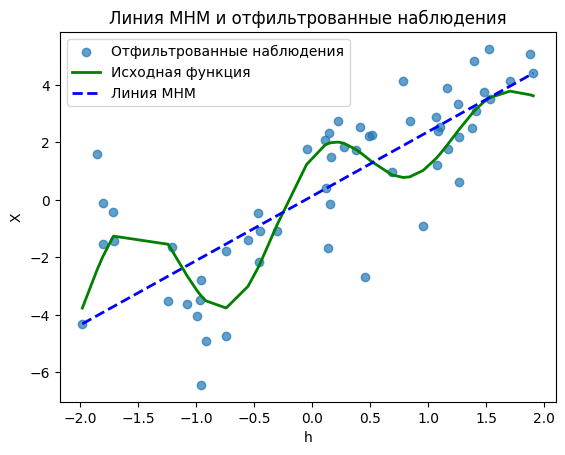

In [ ]:
# График наблюдений и исходной функции
plt.scatter(h_values_filtered, X_values_tukey_filtered, label='Отфильтрованные наблюдения', alpha=0.7)
plt.plot(h_values_sorted, f(h_values_sorted), label='Исходная функция', color='green', linewidth=2)

# График линии регрессии по методу наименьших модулей
plt.plot(h_values_filtered_sorted, X_mnk_filtered[sorted_indices_filtered] @ theta_hat_mnm, label='Линия МНМ', color='blue', linestyle='dashed', linewidth=2)

plt.xlabel('h')
plt.ylabel('X')
plt.legend()
plt.title('Линия МНМ и отфильтрованные наблюдения')
plt.show()



**Анализ остатков**

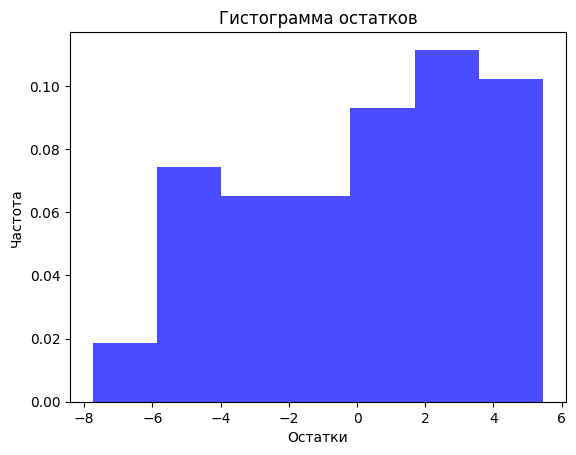

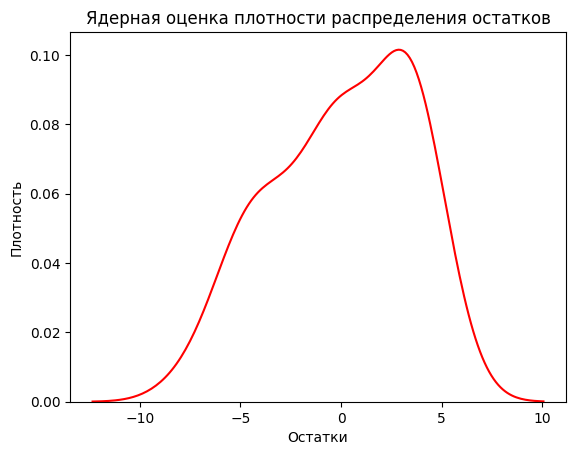

In [ ]:

# Остатки МНМ
residuals = X_values_tukey_filtered - X_mnk_filtered[sorted_indices_filtered] @ theta_hat_mnm

# Гистограмма
plt.hist(residuals, bins='auto', density=True, alpha=0.7, color='blue')
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# Ядерная оценка плотности распределения
sns.kdeplot(residuals, label='Ядерная оценка', color='red')
plt.title('Ядерная оценка плотности распределения остатков')
plt.xlabel('Остатки')
plt.ylabel('Плотность')
plt.show()


In [ ]:
# Тест Шапиро-Уилка
stat, p_value = shapiro(residuals)

# Выводим результаты теста
print("Статистика теста Шапиро-Уилка:", stat)
print("p-значение теста Шапиро-Уилка:", p_value)

# Проверка гипотезы
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о нормальности остатков не отвергается")
else:
    print("Гипотеза о нормальности остатков отвергается")

Статистика теста Шапиро-Уилка: 0.9486953020095825
p-значение теста Шапиро-Уилка: 0.01717209257185459
Гипотеза о нормальности остатков отвергается


In [ ]:
# Вычисляем статистику критерия
stat, p_value = normaltest(residuals)

# Выводим результаты
print("Результаты теста D'Agostino's K^2 для МНК:")
print(f"Статистика критерия: {stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Отвергаем гипотезу о нормальности распределения")
else:
    print("Не отвергаем гипотезу о нормальности распределения")

Результаты теста D'Agostino's K^2 для МНК:
Статистика критерия: 6.726505939860077
P-value: 0.034622449773776834
Отвергаем гипотезу о нормальности распределения


In [ ]:
# Вычисляем статистику Дарбина-Уотсона
dw_statistic = durbin_watson(residuals)

# Выводим статистику
print("Статистика Дарбина-Уотсона:", dw_statistic)

# Проверяем наличие автокорреляции
if dw_statistic < 1.5 or dw_statistic > 2.5:
    print("Есть подозрение на автокорреляцию в остатках")
else:
    print("Автокорреляция в остатках отсутствует")


Статистика Дарбина-Уотсона: 1.071521425183993
Есть подозрение на автокорреляцию в остатках


In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Тест Гольдфельда-Квандта
stat, p_value, _ = het_goldfeldquandt(X_values_tukey_filtered - predictions_mnk_filtered, X_mnk_filtered)

# Выводим результаты теста
print("Статистика теста Гольдфельда-Квандта:", stat)
print("p-значение теста Гольдфельда-Квандта:", p_value)

# Проверка наличия гетероскедастичности
alpha = 0.05
if p_value > alpha:
    print("Гипотеза о гомоскедастичности остатков не отвергается")
else:
    print("Гипотеза о гомоскедастичности остатков отвергается")


Статистика теста Гольдфельда-Квандта: 0.9392397251106298
p-значение теста Гольдфельда-Квандта: 0.5624955934509148
Гипотеза о гомоскедастичности остатков не отвергается


**Робастная оценка Хубера**

Оценки параметров робастной оценки Хубера:
θ0_hat = 0.30565339253827684
θ1_hat = 2.112338427139164


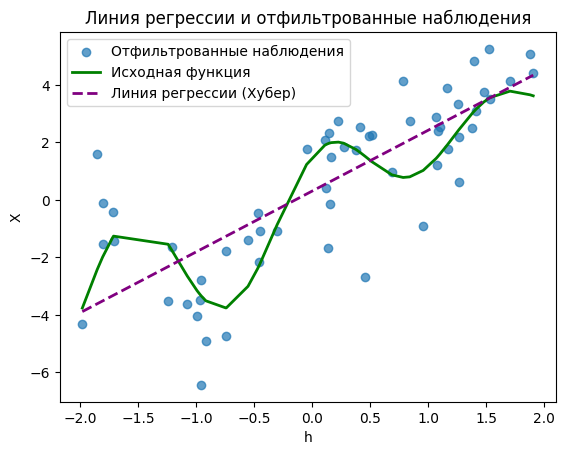

In [ ]:

# Создание матрицы признаков
X_robust = sm.add_constant(h_values_filtered)

# Построение робастной оценки Хубера
huber_model = sm.RLM(X_values_tukey_filtered, X_robust, M=sm.robust.norms.HuberT())
huber_results = huber_model.fit()

# Оценки параметров робастной оценки Хубера
theta_hat_huber = huber_results.params

# Вывод результатов
print("Оценки параметров робастной оценки Хубера:")
print("θ0_hat =", theta_hat_huber[0])
print("θ1_hat =", theta_hat_huber[1])

# График наблюдений и исходной функции
plt.scatter(h_values_filtered, X_values_tukey_filtered, label='Отфильтрованные наблюдения', alpha=0.7)
plt.plot(h_values_sorted, f(h_values_sorted), label='Исходная функция', color='green', linewidth=2)

# График линии регрессии по робастной оценке Хубера
plt.plot(h_values_filtered_sorted, X_robust[sorted_indices_filtered] @ theta_hat_huber, label='Линия регрессии (Хубер)', color='purple', linestyle='dashed', linewidth=2)

plt.xlabel('h')
plt.ylabel('X')
plt.legend()
plt.title('Линия регрессии и отфильтрованные наблюдения')
plt.show()

# 2.5 Квантильная регрессия

**Моделирование нессиметричных ошибок**

In [ ]:
# Создание случайных ошибок
errors = np.random.normal(0, sigma, 60)

# Процент отрицательных ошибок для изменения знака
percentage_to_flip = 0.9

# Определение числа ошибок, которые нужно изменить
num_errors_to_flip = int(percentage_to_flip * len(errors))

# Случайный выбор индексов для изменения знака
indices_to_flip = np.random.choice(len(errors), num_errors_to_flip, replace=False)

# Изменение знака у выбранных ошибок
errors[indices_to_flip] = np.abs(errors[indices_to_flip])

# Создание данных с несимметричными ошибками
X_values_asymmetric = f(h_values) + errors


**МНК и МНМ**

In [ ]:
from scipy.optimize import minimize

# МНК-оценки параметров
X_mnk_asymmetric = sm.add_constant(h_values)
theta_hat_mnk_asymmetric = np.linalg.inv(X_mnk_asymmetric.T @ X_mnk_asymmetric) @ X_mnk_asymmetric.T @ X_values_asymmetric

# МНМ-оценки параметров
def objective_function_huber(theta, X, Y):
    return np.sum(sm.robust.norms.HuberT().psi(Y - X @ theta))

result_mnm_asymmetric = minimize(objective_function_huber, np.zeros(2), args=(X_mnk_asymmetric, X_values_asymmetric), method='nelder-mead')
theta_hat_mnm_asymmetric = result_mnm_asymmetric.x

# Вывод результатов
print("МНК-оценки параметров для несимметричных ошибок:")
print("θ0_hat =", theta_hat_mnk_asymmetric[0])
print("θ1_hat =", theta_hat_mnk_asymmetric[1])

print("\nМНМ-оценки параметров для несимметричных ошибок:")
print("θ0_hat =", theta_hat_mnm_asymmetric[0])
print("θ1_hat =", theta_hat_mnm_asymmetric[1])


МНК-оценки параметров для несимметричных ошибок:
θ0_hat = 1.443870757856569
θ1_hat = 2.004779128326565

МНМ-оценки параметров для несимметричных ошибок:
θ0_hat = 43.9163634954095
θ1_hat = -52.094658706903466


**Оценка качества квантильных регрессий**

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Создание DataFrame для удобства использования формулы
data = pd.DataFrame({'h_values': h_values, 'X_values_asymmetric': X_values_asymmetric})

# Спецификация модели квантильной регрессии для разных значений α
quantiles = [0.1, 0.5, 0.9]  # Пример значений, можно изменить
quantile_reg_models = []

for alpha in quantiles:
    # Формула квантильной регрессии
    formula = 'X_values_asymmetric ~ h_values'

    # Создание и обучение модели
    quantile_reg_model = smf.quantreg(formula, data)
    quantile_reg_result = quantile_reg_model.fit(q=alpha)
    quantile_reg_models.append(quantile_reg_result)

# Вывод результатов
for i, alpha in enumerate(quantiles):
    print(f"\nКвантильная регрессия для α={alpha}:")
    print(quantile_reg_models[i].summary())



Квантильная регрессия для α=0.1:
                          QuantReg Regression Results                          
Dep. Variable:     X_values_asymmetric   Pseudo R-squared:               0.3497
Model:                        QuantReg   Bandwidth:                       3.028
Method:                  Least Squares   Sparsity:                        9.455
Date:                 Thu, 30 Nov 2023   No. Observations:                   60
Time:                         15:14:53   Df Residuals:                       58
                                         Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9412      0.398     -2.366      0.021      -1.738      -0.145
h_values       2.3858      0.287      8.303      0.000       1.811       2.961

Квантильная регрессия для α=0.5:
                          QuantReg Regression Results   

**График**

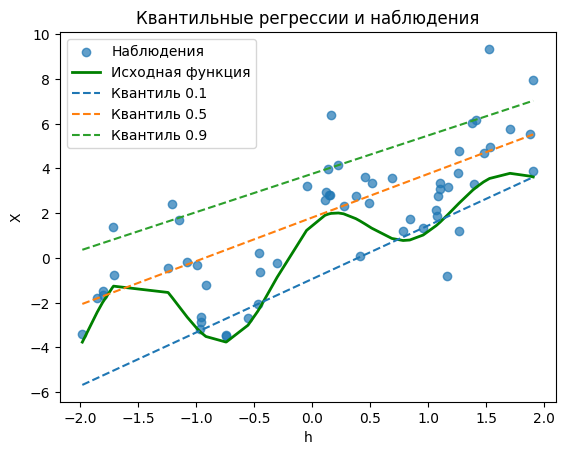

In [ ]:

# Сортировка значений h_values для гладкого отображения линии
h_values_sorted = np.sort(h_values)

# График наблюдений и исходной функции
plt.scatter(h_values, X_values_asymmetric, label='Наблюдения', alpha=0.7)
plt.plot(h_values_sorted, f(h_values_sorted), label='Исходная функция', color='green', linewidth=2)

# График линий квантильной регрессии
for i, alpha in enumerate(quantiles):
    quantile_line = quantile_reg_models[i].params['h_values'] * h_values_sorted + quantile_reg_models[i].params['Intercept']
    plt.plot(h_values_sorted, quantile_line, label=f'Квантиль {alpha}', linestyle='dashed')

plt.xlabel('h')
plt.ylabel('X')
plt.legend()
plt.title('Квантильные регрессии и наблюдения')
plt.show()
